In [1]:
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft

In [2]:
alpha = 1 + 260%3
print(alpha)

3


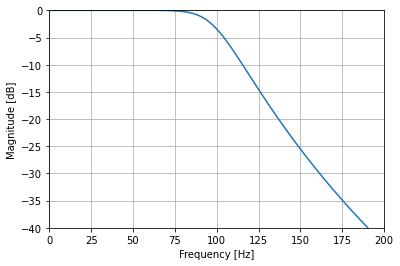

In [124]:
fs = 720
N = 7
fc = 10

w_c = 2 * fc/fs
[b, a] = sp.butter(N, w_c)
[z, p, k] = sp.tf2zpk(b, a)
#p = p/20*np.pi
'''[z, p, k] = sp.butter(N, w_c, output = 'zpk')
print(k)
p = p*1.0966
[b, a] = sp.zpk2tf(z,p,k)'''
#[b, a] = sp.zpk2tf(z,p,k)
[w, h] = sp.freqz(b, a, worN = 2000)
w = w * fs/2*np.pi
h_db = 20 * np.log10(abs(h))

plt.plot(w, h_db)
plt.xlabel('Frequency [Hz]')

plt.ylabel('Magnitude [dB]')
plt.xlim(0,200)
plt.ylim(-40, 0)
plt.grid()

TypeError: 'numpy.ndarray' object is not callable

In [23]:
z = []
p = np.array([-0.2440 + 1.0691j,
  -0.2440 - 1.0691j,
  -0.6837 + 0.8573j,
  -0.6837 - 0.8573j,
  -1.0966 + 0.0000j,
  -0.9880 + 0.4757j,
  -0.9880 - 0.4757j]
)
k = 1
fs = 720

In [33]:
filtz = sp.lti(*sp.bilinear_zpk(z, p,k, fs))

In [40]:
print(p)
print(filtz.gain)

[-0.244 +1.0691j -0.244 -1.0691j -0.6837+0.8573j -0.6837-0.8573j
 -1.0966+0.j     -0.988 +0.4757j -0.988 -0.4757j]
7.76204762792035e-23


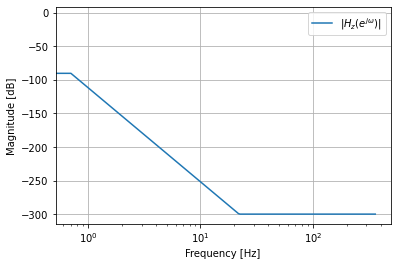

In [38]:
wz, hz = sp.freqz_zpk(filtz.zeros, filtz.poles, filtz.gain)

#ws, hs = sp.freqs_zpk(filts.zeros, filts.poles, filts.gain,

                        #  worN=fs*wz)

plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),label=r'$|H_z(e^{j \omega})|$')

#plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)),label=r'$|H(j \omega)|$')

plt.legend()

plt.xlabel('Frequency [Hz]')

plt.ylabel('Magnitude [dB]')

plt.grid()

In [39]:
sp.buttap(7)

(array([], dtype=float64),
 array([-0.22252093+0.97492791j, -0.6234898 +0.78183148j,
        -0.90096887+0.43388374j, -1.        -0.j        ,
        -0.90096887-0.43388374j, -0.6234898 -0.78183148j,
        -0.22252093-0.97492791j]),
 1)

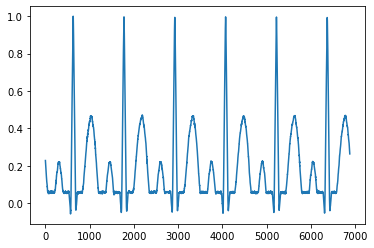

In [14]:
ECG = np.loadtxt("ECG_Data.txt")
plt.plot(ECG)

In [6]:
Fs_instrument, instrument_track = wavfile.read("instru3.wav")
IPython.display.Audio(instrument_track, rate = Fs_instrument)
instrument_track = instrument_track/32767.0
IPython.display.Audio(instrument_track, rate = Fs_instrument)

Text(0.5, 1.0, 'Spectrogram of instrument track')

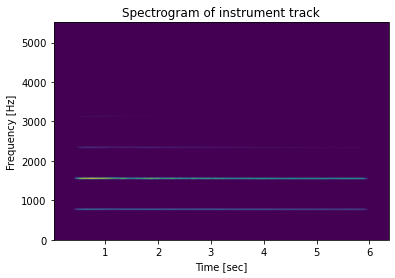

In [7]:
f, t, Sxx = sp.spectrogram(instrument_track, Fs_instrument, window = "hanning",nperseg = 512 ,noverlap = 128)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of instrument track")

Text(0, 0.5, 'Magnitude [dB]')

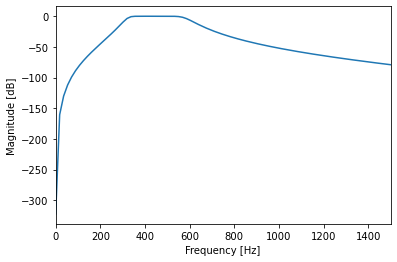

In [101]:
n = 5
fc = np.array([500,900])

w_c_instrument = 2 * fc / Fs_instrument
[b, a] = sp.butter(n, w_c_instrument, btype='bandpass')

[w, h] = sp.freqz(b, a, worN = 200)
w = w * fs/2*np.pi
h_db = 20 * np.log10(abs(h))

plt.plot(w, h_db)
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 1500)
plt.ylabel('Magnitude [dB]')


In [99]:
sos = sp.butter(10, w_c_instrument, btype='bandpass', output='sos')

filtered = sp.sosfilt(sos, instrument_track)

IPython.display.Audio(filtered, rate = Fs_instrument)



Text(0.5, 1.0, 'Spectrogram of instrument track')

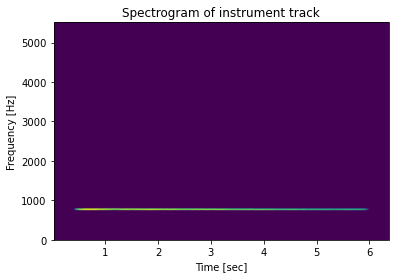

In [100]:
f, t, Sxx = sp.spectrogram(filtered, Fs_instrument, window = "hanning",nperseg = 512 ,noverlap = 128)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.title("Spectrogram of instrument track")